In [2]:
from casadi import *
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
data = sm.datasets.engel.load_pandas().data
data.head()


,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


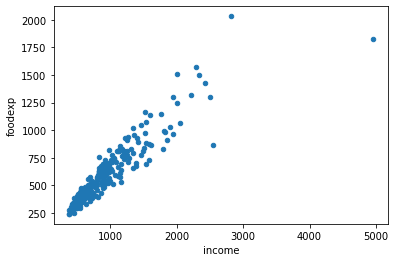

In [3]:
import matplotlib.pyplot as plt
ax = data.plot(x='income', y='foodexp', kind='scatter')
N_samples=data.shape[0]
N_features=data.shape[1]
# ax.set_xscale('log')

In [8]:
N_features = 2

beta = MX.sym('beta', (N_features))

tau = .95

obj = 0
x = DM(data['income'])
y = DM(data['foodexp'])

conds = if_else(y > x * beta, 
tau*(y - x * beta), 
(1-tau)*(x * beta - y))
for i in range(conds.shape[0]):
    obj += conds[i]

prob = {'f': obj, 'x': beta}

solver = nlpsol('solver', 'ipopt', prob)

sol = solver(x0=0.1)
a = 1

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.1740780e+05 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

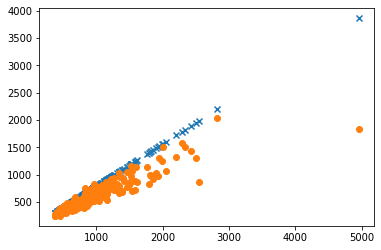

In [5]:
beta_est = sol['x'].full()[0][0]
xa = x.full()
ya = y.full()

fig, ax = plt.subplots(1)
ax.scatter(xa, beta_est*xa, marker='x')
ax.scatter(xa, ya, marker='o')

In [6]:
xa

array([[ 420.15765084],
       [ 541.41170672],
       [ 901.15745665],
       [ 639.08022869],
       [ 750.87560583],
       [ 945.79893105],
       [ 829.39788685],
       [ 979.16483584],
       [1309.87894038],
       [1492.39874437],
       [ 502.83898022],
       [ 616.71684724],
       [ 790.92251129],
       [ 555.87864164],
       [ 713.44118368],
       [ 838.75613272],
       [ 535.0766459 ],
       [ 596.44080536],
       [ 924.56189658],
       [ 487.75830182],
       [ 692.63973424],
       [ 997.87697782],
       [ 506.99949118],
       [ 654.1587114 ],
       [ 933.91927018],
       [ 433.68132925],
       [ 587.59621334],
       [ 896.47463564],
       [ 454.47822378],
       [ 584.99891937],
       [ 800.79901662],
       [ 502.4368699 ],
       [ 713.51966653],
       [ 906.00062873],
       [ 880.59692379],
       [ 796.82891937],
       [ 854.87905261],
       [1167.37159427],
       [ 523.80003558],
       [ 670.77918543],
       [ 377.05836885],
       [ 851.543